In [1]:
import sys,os
import pandas as pd 	#for CSV or large data files
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt, seaborn as sns	#for ploting or visual representation of data
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error,r2_score,mean_absolute_percentage_error)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor

<h3 style="color:orange">Load Data</h3>

In [2]:
data=pd.read_csv("./bike+sharing+dataset/hour.csv")

data=data.drop(["instant","dteday","casual","registered"],axis=1)

print(data.shape)
data

(17379, 13)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [3]:
print(f"has duplicated: {data.duplicated().sum()}")
print(f"has null: {data.isna().sum()}")

# remove duplicates
data.drop_duplicates(inplace=True)
print(f"\nhas duplicated: {data.duplicated().sum()}")

data.describe()

has duplicated: 2
has null: season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

has duplicated: 0


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<h3 style="color:orange">Split data</h3>

In [4]:
x=data.drop(["cnt"],axis=1)
y=data["cnt"]

# Standardize data
st=StandardScaler()
x_scale=st.fit_transform(x)

<h3 style="color:orange">train test split</h3>

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
x_scale_train,x_scale_test,y_train,y_test=train_test_split(x_scale,y,train_size=0.7,random_state=42)       # for Linear regressor

print(f"x train: {x_train.shape}, y train: {y_train.shape}\nx test: {x_test.shape}, y test: {y_test.shape}\n")

x train: (12163, 12), y train: (12163,)
x test: (5214, 12), y test: (5214,)



<h3 style="color:orange">BAseline model</h3>

In [6]:
model_scores=dict()

<h5 style="color:cyan">Decision Tree</h5>

DecisionTree Regressor Accuracy: 0.6734524156839761
MSE: 10040.639379550932
RMSE: 100.20299087128554
R²: 0.6734524156839761
MAPE: 0.75755669622993


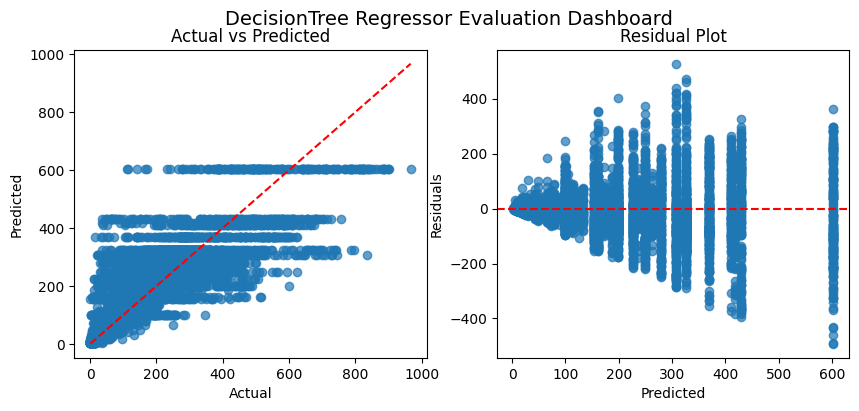

In [7]:
model=DecisionTreeRegressor(max_depth=6,random_state=42)
model_name="DecisionTree Regressor"
model_scores[model_name]=dict()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mMSE: \u001b[0m{mean_squared_error(y_test,y_pred)}")
print(f"\u001b[33mRMSE: \u001b[0m{mean_squared_error(y_test,y_pred)**0.5}")
print(f"\u001b[33mR²: \u001b[0m{r2_score(y_test,y_pred)}")
print(f"\u001b[33mMAPE: \u001b[0m{mean_absolute_percentage_error(y_test,y_pred)}")

residuals = y_test - y_pred

model_scores[model_name]["RMSE"]=mean_squared_error(y_test,y_pred)**0.5
model_scores[model_name]["R^2"]=r2_score(y_test,y_pred)
model_scores[model_name]["MAPE"]=mean_absolute_percentage_error(y_test,y_pred)

fig, axes = plt.subplots(1,2, figsize=(10,4))
fig.suptitle(f"{model_name} Evaluation Dashboard", fontsize=14)

# Scatter: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Residual Plot
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_title("Residual Plot")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")

plt.subplots_adjust(hspace=0.6)

<h5 style="color:cyan">Linear Regerssion</h5>

c:\Users\shash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Linear Regressor Accuracy: -18.360423909563828
MSE: 18725.386900784255
RMSE: 136.84073553143543
R²: 0.39100194452880566
MAPE: 3.630595349768809


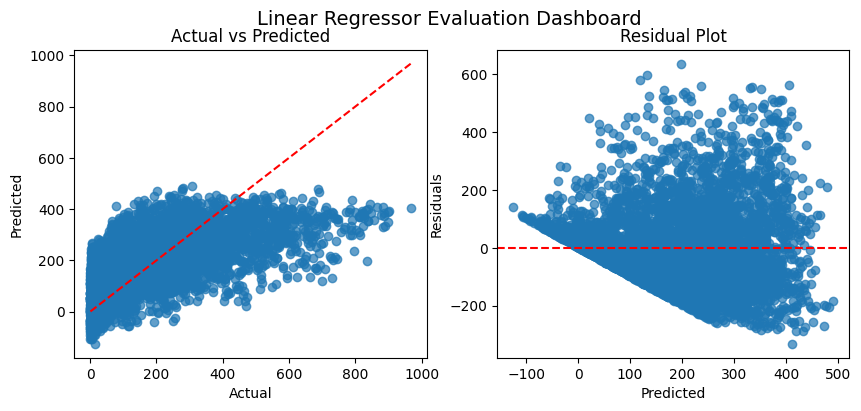

In [8]:
model=LinearRegression()
model_name="Linear Regressor"
model_scores[model_name]=dict()

model.fit(x_scale_train,y_train)
y_pred=model.predict(x_scale_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mMSE: \u001b[0m{mean_squared_error(y_test,y_pred)}")
print(f"\u001b[33mRMSE: \u001b[0m{mean_squared_error(y_test,y_pred)**0.5}")
print(f"\u001b[33mR²: \u001b[0m{r2_score(y_test,y_pred)}")
print(f"\u001b[33mMAPE: \u001b[0m{mean_absolute_percentage_error(y_test,y_pred)}")

residuals = y_test - y_pred

model_scores[model_name]["RMSE"]=mean_squared_error(y_test,y_pred)**0.5
model_scores[model_name]["R^2"]=r2_score(y_test,y_pred)
model_scores[model_name]["MAPE"]=mean_absolute_percentage_error(y_test,y_pred)

fig, axes = plt.subplots(1,2, figsize=(10,4))
fig.suptitle(f"{model_name} Evaluation Dashboard", fontsize=14)

# Scatter: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Residual Plot
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_title("Residual Plot")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")

plt.subplots_adjust(hspace=0.6)

<h5 style="color:cyan">Results — Baseline models</h5>

**Decision Tree (max_depth=6)**  
- RMSE (test set): 100.20299087128554

**Linear Regression (with StandardScaler)**  
- RMSE (test set): 136.84073553143543

**Baseline chosen:** Decision Tree

**interpretation:**  
- The Decision Tree shows (insert behaviour: e.g., higher or lower RMSE).  
- Linear Regression (with standardization) shows (insert observation).  
- Pick the better of the two as the baseline for comparison with ensembles.


Text(0.5, 1.0, 'RMSE of baseline model')

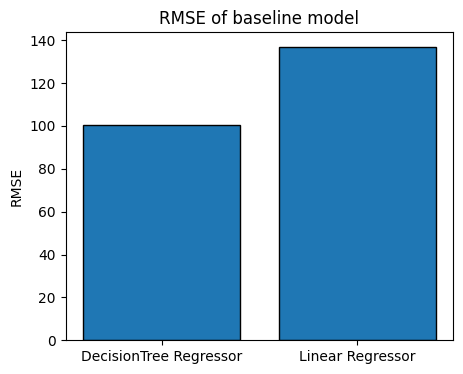

In [9]:
RMSE_score=np.array([v["RMSE"] for v in model_scores.values()])
plt.figure(figsize=(5,4))
plt.bar(range(len(RMSE_score)),RMSE_score, edgecolor='black')
_=plt.xticks(range(len(model_scores)), model_scores.keys(), fontsize=10)
plt.ylabel("RMSE")
plt.title("RMSE of baseline model")

<h3 style="color:orange">Bagging (Bootstrap Aggregating)</h3>

**Bagging** is an ensemble technique designed primarily to **reduce model variance** and improve stability of high-variance learners such as Decision Trees.

The core idea is :
-  Train multiple models on different random subsets (bootstrapped samples) of the training data  
-  and **average** their predictions to reduce random fluctuations.

###  Step-by-Step Intuition
1. From the original dataset of size `N`, sample (with replacement) `N` observations → this forms one **bootstrap sample**.  
2. Train a base model  $f_b(x)$ (e.g., a Decision Tree) on each bootstrap sample.  
3. Repeat this process $B$ times, creating $B$ different models.  
4. Combine their predictions:
   - **Regression:** average them  
     $$\hat{f}_{\text{bag}}(x) = \frac{1}{B} \sum_{b=1}^{B} f_b(x)$$
   - **Classification:** take majority vote.

Each $f_b(x)$ is slightly different because each model sees a slightly different dataset due to resampling.  
Averaging smooths out the noise of individual models.


Suppose each individual model has:
- Bias = $\text{Bias}[f_b(x)]$
- Variance = $\text{Var}[f_b(x)] $

Then the expected mean squared error (MSE) of a single model is:
$$\text{MSE}[f_b(x)] = \text{Bias}^2 + \text{Var} + \sigma^2_{\text{noise}}$$

For the **bagged ensemble**, since predictions are averaged:
$$\text{Var}\big[\hat{f}_{\text{bag}}(x)\big]
= \rho\,\text{Var}[f_b(x)] + \frac{(1-\rho)\,\text{Var}[f_b(x)]}{B}
$$

where $\rho$ is the correlation between individual model predictions.
- As  $B \to \infty$, the second term approaches 0.  
- If models are **uncorrelated** ($\rho$ small), variance reduction is large.  
- Therefore, bagging reduces variance substantially **when base learners are unstable and decorrelated**.

#### $\textcolor{lightblue}{\text{Bias–Variance Perspective}}$

| Model | Effect on Bias | Effect on Variance | Learning Pattern |
|--------|----------------|--------------------|------------------|
| **Single Decision Tree (baseline)** | Low Bias | **High Variance** | Sensitive to small data changes; prone to overfitting |
| **Bagging Ensemble (Decision Trees)** | Similar Bias | **Reduced Variance** | Averages multiple trees trained on bootstrapped samples, stabilizing predictions |
| **Linear Regression (baseline)** | **High Bias** | Low Variance | Simple linear relationships; cannot model non-linear patterns |

#### $\textcolor{lightgreen}{\text{Key Insight}}$

Bagging transforms a set of **unstable** models into a **stable and reliable** predictor.  
In practice, this often translates to lower test RMSE compared to a single Decision Tree baseline, confirming the theory of **variance reduction** through averaging.

in our case The Bagging Regressor achieves a lower RMSE than the single Decision Tree baseline, demonstrating effective **variance reduction**.

- Each Decision Tree has high variance because it reacts strongly to small data changes.
- Bagging trains many trees on different random subsets (bootstrap samples).
- Averaging their predictions cancels out noise and stabilizes predictions.
- The result: lower test RMSE and smoother prediction curves.


Bagging (DecisionTree) Accuracy: 0.6974888248423982
MSE: 9301.57123778361
RMSE: 96.4446537542834
R²: 0.6974888248423982
MAPE: 0.7341378888678246


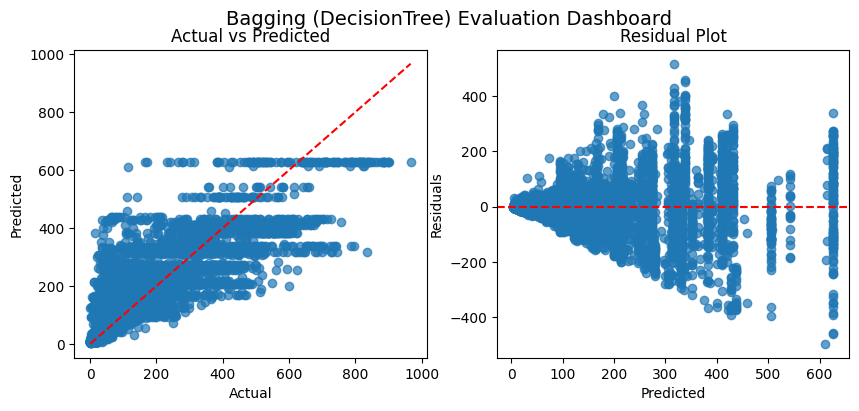

In [10]:
base_model=DecisionTreeRegressor(max_depth=6,random_state=6)
model=BaggingRegressor(base_model,n_estimators=50,random_state=42,bootstrap=True)
model_name="Bagging (DecisionTree)"
model_scores[model_name]=dict()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mMSE: \u001b[0m{mean_squared_error(y_test,y_pred)}")
print(f"\u001b[33mRMSE: \u001b[0m{mean_squared_error(y_test,y_pred)**0.5}")
print(f"\u001b[33mR²: \u001b[0m{r2_score(y_test,y_pred)}")
print(f"\u001b[33mMAPE: \u001b[0m{mean_absolute_percentage_error(y_test,y_pred)}")

residuals = y_test - y_pred

model_scores[model_name]["RMSE"]=mean_squared_error(y_test,y_pred)**0.5
model_scores[model_name]["R^2"]=r2_score(y_test,y_pred)
model_scores[model_name]["MAPE"]=mean_absolute_percentage_error(y_test,y_pred)

fig, axes = plt.subplots(1,2, figsize=(10,4))
fig.suptitle(f"{model_name} Evaluation Dashboard", fontsize=14)

# Scatter: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Residual Plot
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_title("Residual Plot")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")

plt.subplots_adjust(hspace=0.6)

<h3 style="color:orange">Boosting (Bias Reduction)</h3>

**Gradient Boosting** is an ensemble learning technique that primarily targets **bias reduction** by combining many *weak learners* (typically shallow Decision Trees) **sequentially**.  
Each new model is trained to correct the **errors (residuals)** made by the ensemble so far.

In contrast to Bagging (which trains models independently and averages them), **Boosting** trains models *additively* — each model learns from the mistakes of its predecessors.

### Step-by-Step Intuition

1. Start with a simple model  f_0(x) , often a constant (e.g., the mean of the target).
2. Compute residuals — the difference between true and predicted values:
   $$r_i^{(m)} = y_i - f_{m-1}(x_i)$$
3. Train a weak learner $ h_m(x) $ (e.g., a small Decision Tree) to predict these residuals.
4. Update the model by adding a scaled version of this weak learner:
   $$f_m(x) = f_{m-1}(x) + \eta \cdot h_m(x)$$
   where $ \eta \in (0,1] $ is the **learning rate** controlling how much each learner contributes.
5. Repeat for $ M $ iterations (or learners).  
   The final boosted model is:
   $$\hat{f}(x) = f_0(x) + \eta \sum_{m=1}^{M} h_m(x)$$


Gradient Boosting can be understood as performing **gradient descent** in *function space* to minimize a loss function $ L(y, f(x)) $.  

At each iteration $ m $, we fit the weak learner $ h_m(x) $ to the **negative gradient** of the loss:
$$h_m(x_i) \approx -\frac{\partial L(y_i, f_{m-1}(x_i))}{\partial f_{m-1}(x_i)}$$

Then update:
$$f_m(x) = f_{m-1}(x) + \eta h_m(x)$$

Thus, each new tree takes a small step in the direction that most reduces the loss, exactly like gradient descent — but instead of updating numeric parameters, we update functions.

#### $\textcolor{lightblue}{\text{Bias–Variance Perspective}}$

| Model | Effect on Bias | Effect on Variance | Learning Pattern |
|--------|----------------|--------------------|------------------|
| **Decision Tree (shallow)** | High Bias | Low Variance | Simple, underfits |
| **Boosted Trees (many)** | **Low Bias** | Moderate Variance | Learns residuals iteratively |
| **Bagging Ensemble** | Same Bias | **Low Variance** | Averages independent models |

#### $\textcolor{lightgreen}{\text{Key Insight}}$

Gradient Boosting improves predictive accuracy by progressively reducing bias.  
Unlike Bagging (which reduces variance through averaging), Boosting learns **what previous models got wrong** and corrects those errors iteratively — leading to a **lower test RMSE** and smoother generalization curve.

In our case, the **Gradient Boosting Regressor** achieves a lower RMSE than both the single Decision Tree and the Bagging Regressor, demonstrating effective **bias reduction**.

- Each Decision Tree in boosting is a weak learner with high bias and low variance.  
- Gradient Boosting trains these weak learners **sequentially**, where each new tree focuses on correcting the **residual errors** made by the previous ensemble.  
- This iterative learning process gradually reduces the overall bias of the model.Each iteration fits residuals, so bias decreases with more learners (until overfitting starts).
- As a result, the ensemble learns complex, non-linear relationships in the data and achieves **better predictive accuracy** and **lower test RMSE** than the single or bagged models.


Gradient Boosting Regressor Accuracy: 0.8613668093170285
MSE: 4262.673927292416
RMSE: 65.28915627646306
R²: 0.8613668093170285
MAPE: 0.932936293890744


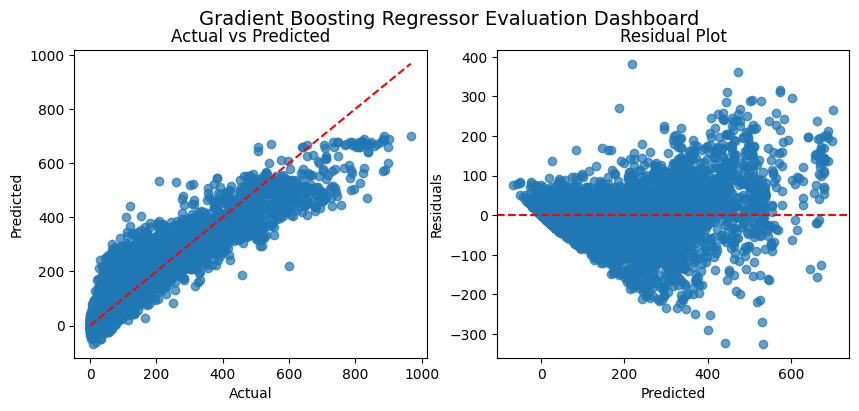

In [11]:
model=GradientBoostingRegressor(random_state=42)
model_name="Gradient Boosting Regressor"
model_scores[model_name]=dict()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mMSE: \u001b[0m{mean_squared_error(y_test,y_pred)}")
print(f"\u001b[33mRMSE: \u001b[0m{mean_squared_error(y_test,y_pred)**0.5}")
print(f"\u001b[33mR²: \u001b[0m{r2_score(y_test,y_pred)}")
print(f"\u001b[33mMAPE: \u001b[0m{mean_absolute_percentage_error(y_test,y_pred)}")

residuals = y_test - y_pred

model_scores[model_name]["RMSE"]=mean_squared_error(y_test,y_pred)**0.5
model_scores[model_name]["R^2"]=r2_score(y_test,y_pred)
model_scores[model_name]["MAPE"]=mean_absolute_percentage_error(y_test,y_pred)

fig, axes = plt.subplots(1,2, figsize=(10,4))
fig.suptitle(f"{model_name} Evaluation Dashboard", fontsize=14)

# Scatter: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Residual Plot
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_title("Residual Plot")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")

plt.subplots_adjust(hspace=0.6)

<h3 style="color:orange">Stacking</h3>

**Stacking (Stacked Generalization)** is an advanced ensemble learning method that combines the strengths of multiple diverse base models (called *Level-0 learners*) through a *Meta-Learner* (Level-1 model).  
Unlike Bagging or Boosting, which combine models using simple averaging or sequential correction, **Stacking learns an optimal way to combine model outputs**.

The key idea:
- Each base model captures different patterns in the data, and the meta-learner learns how to best blend these predictions to minimize the overall error.

### Architecture

| Level | Learners | Role |
|--------|-----------|------|
| **Level-0 (Base learners)** | K-Nearest Neighbors, Bagging Regressor, Gradient Boosting Regressor | Learn different perspectives of the data |
| **Level-1 (Meta learner)** | Ridge Regression | Learns to combine Level-0 predictions optimally |

- The base learners each make predictions on the training data.  
- These predictions are then used as new input features for the meta-learner, which learns how to weight and combine them.

Let there be $K$ base regressors:
$$\{h_1(x), h_2(x), \dots, h_K(x)\}$$

Each base learner produces a prediction:
$$z_k = h_k(x)$$

These predictions form a new feature vector:
$$\mathbf{z} = [z_1, z_2, \dots, z_K]$$

The meta-learner $g(\cdot)$ (in this case, Ridge Regression) learns to map these meta-features to the final output:
$$\hat{y} = g(\mathbf{z}) = g(h_1(x), h_2(x), \dots, h_K(x))$$

The meta-learner is trained to minimize the final prediction error (e.g., RMSE) across the validation or cross-validation folds.

#### $\textcolor{lightblue}{\text{Bias–Variance Perspective}}$

| Model | Bias | Variance | Learning Pattern |
|--------|------|-----------|----------|
| **KNN Regressor** | Low bias| high variance | Learns local patterns well |
| **Bagging Regressor** | Moderate bias| low variance | Stabilizes tree predictions |
| **Gradient Boosting Regressor** | Low bias| moderate variance | Learns complex relationships |


By combining these, Stacking achieves:
- **Lower bias** → thanks to boosting’s strong fitting capability  
- **Lower variance** → from bagging’s averaging effect  
- **Local adaptability** → captured by KNN  
The meta-learner (Ridge) balances their contributions by learning optimal weights.

#### $\textcolor{lightgreen}{\text{Key Insight}}$

Stacking combines the strengths of multiple diverse models through a meta-learning approach, leading to superior predictive accuracy.  
Unlike Bagging or Boosting, which combine models in fixed ways (averaging or sequential correction), **Stacking learns how to combine model outputs optimally** using a **meta-learner** trained on their predictions.

In our case, the **Stacking Regressor** achieves the **lowest RMSE** among all models — outperforming the single Decision Tree, Bagging, and Gradient Boosting Regressors — demonstrating effective **bias–variance balance** and **meta-learning optimization**.

- Each base learner contributes unique strengths:
  - **KNN Regressor** captures local patterns and non-linear relationships in feature space.
  - **Bagging Regressor** reduces variance by averaging predictions from multiple trees.
  - **Gradient Boosting Regressor** reduces bias by sequentially learning from residuals.
- The **Meta-Learner (Ridge Regression)** learns the optimal weights to combine these diverse predictions, reducing both bias and variance simultaneously.
- This hybrid learning structure allows Stacking to model complex relationships and correct systematic errors made by individual models.
- As a result, the ensemble achieves **the lowest test RMSE** and exhibits **strong generalization performance** compared to any single or simpler ensemble model.


Stacking Regressor Accuracy: 0.8613668093170285
MSE: 1646.6844177782089
RMSE: 40.57935950428751
R²: 0.9464455600455633
MAPE: 0.3865236839927003


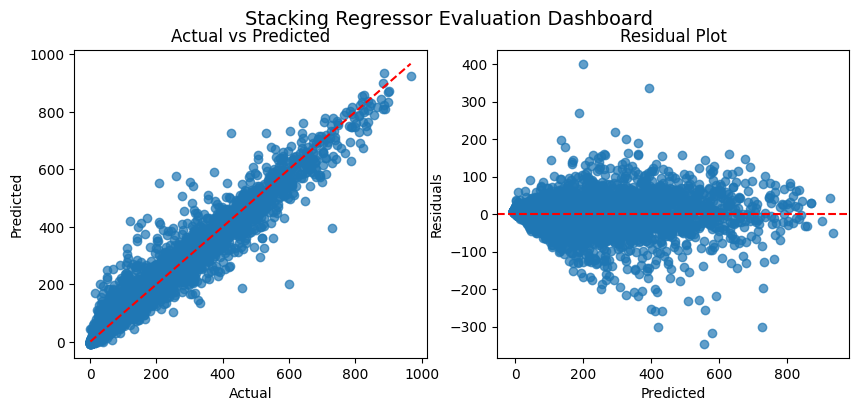

In [12]:
knn = KNeighborsRegressor(n_neighbors=5)
bag_model=BaggingRegressor(DecisionTreeRegressor(random_state=42),n_estimators=50,random_state=42,n_jobs=-1,bootstrap=True)
boost_model=GradientBoostingRegressor(random_state=42)
model_name="Stacking Regressor"
model_scores[model_name]=dict()

estimators = [('knn', knn), ('bag', bag_model), ('gbr', boost_model)]
stack = StackingRegressor(estimators=estimators, final_estimator=Ridge(), n_jobs=-1)
stack.fit(x_train, y_train)
y_pred = stack.predict(x_test)


# model evaluation score
print(f"\u001b[33m{model_name} Accuracy: \u001b[0m{model.score(x_test,y_test)}")
print(f"\u001b[33mMSE: \u001b[0m{mean_squared_error(y_test,y_pred)}")
print(f"\u001b[33mRMSE: \u001b[0m{mean_squared_error(y_test,y_pred)**0.5}")
print(f"\u001b[33mR²: \u001b[0m{r2_score(y_test,y_pred)}")
print(f"\u001b[33mMAPE: \u001b[0m{mean_absolute_percentage_error(y_test,y_pred)}")

residuals = y_test - y_pred

model_scores[model_name]["RMSE"]=mean_squared_error(y_test,y_pred)**0.5
model_scores[model_name]["R^2"]=r2_score(y_test,y_pred)
model_scores[model_name]["MAPE"]=mean_absolute_percentage_error(y_test,y_pred)

fig, axes = plt.subplots(1,2, figsize=(10,4))
fig.suptitle(f"{model_name} Evaluation Dashboard", fontsize=14)

# Scatter: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Residual Plot
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(0, color='r', linestyle='--')
axes[1].set_title("Residual Plot")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")

plt.subplots_adjust(hspace=0.6)


<h3 style="color:orange">Final analysis</h3>

In [39]:
RMSE_score=np.array([v["RMSE"] for v in model_scores.values()])
R2_score=np.array([v["R^2"] for v in model_scores.values()])
MAPE_score=np.array([v["MAPE"] for v in model_scores.values()])

name=np.array(list(model_scores.keys())).reshape(-1,1)
t=np.hstack([name,RMSE_score.reshape(-1,1),R2_score.reshape(-1,1),MAPE_score.reshape(-1,1)])

score=pd.DataFrame(t,columns=["Model","RMSE","R^2","MAPE"])
score

,Model,RMSE,R^2,MAPE
0,DecisionTree Regressor,100.20299087128554,0.6734524156839761,0.75755669622993
1,Linear Regressor,136.84073553143543,0.39100194452880566,3.630595349768809
2,Bagging (DecisionTree),96.4446537542834,0.6974888248423982,0.7341378888678246
3,Gradient Boosting Regressor,65.28915627646306,0.8613668093170285,0.932936293890744
4,Stacking Regressor,40.57935950428751,0.9464455600455633,0.3865236839927003


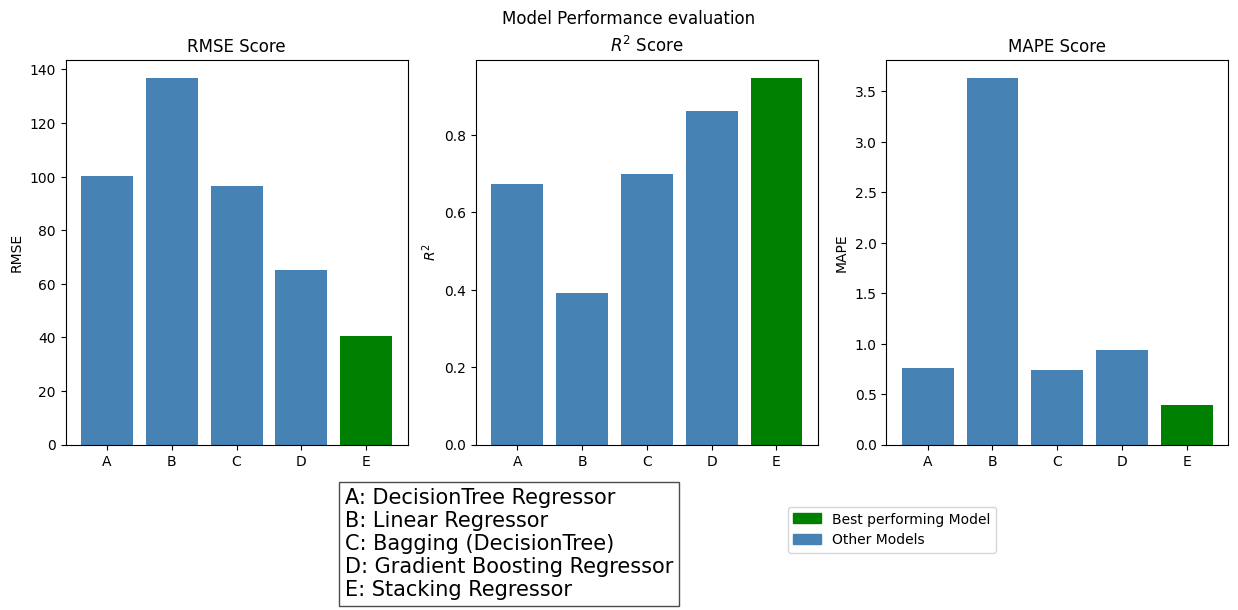

In [40]:
best_rmse = min(RMSE_score)
best_r2 = max(R2_score)
best_mape = min(MAPE_score)

rmse_colors = ['green' if v == best_rmse else 'steelblue' for v in RMSE_score]
r2_colors   = ['green' if v == best_r2 else 'steelblue' for v in R2_score]
mape_colors = ['green' if v == best_mape else 'steelblue' for v in MAPE_score]

legend_patches = [
    mpatches.Patch(color='green', label='Best performing Model'),
    mpatches.Patch(color='steelblue', label='Other Models')
]

fig,ax=plt.subplots(1,3,figsize=(15,5))
fig.suptitle("Model Performance evaluation")

ax[0].bar(range(len(RMSE_score)),RMSE_score,color=rmse_colors)
ax[0].set_xticks(range(len(model_scores.keys())),["A","B","C","D","E"])
ax[0].set_ylabel("RMSE")
ax[0].set_title("RMSE Score")


ax[1].bar(range(len(R2_score)),R2_score,color=r2_colors)
ax[1].set_xticks(range(len(model_scores.keys())),["A","B","C","D","E"])
ax[1].set_ylabel("$R^2$")
ax[1].set_title("$R^2$ Score")

ax[2].bar(range(len(MAPE_score)),MAPE_score,color=mape_colors)
ax[2].set_xticks(range(len(model_scores.keys())),["A","B","C","D","E"])
ax[2].set_ylabel("MAPE")
ax[2].set_title("MAPE Score")

_=plt.text(-9, -1.5, "A: DecisionTree Regressor\nB: Linear Regressor " \
"\nC: Bagging (DecisionTree)\nD: Gradient Boosting Regressor\nE: Stacking Regressor", fontsize=15,
         bbox=dict(facecolor="white", alpha=0.7))

fig.legend(handles=legend_patches, loc='lower right', ncol=1,bbox_to_anchor=(0.75,-0.12))

####  $\textcolor{#42EFFF}{\text{Bias–Variance Trade-off}}$

the **bias–variance trade-off** helps explain why ensemble models outperform single models in this regression task.  
Each ensemble method (Bagging, Boosting, Stacking) tackles a different aspect of model generalization.

#### Baseline Models
- **Linear Regression** has **high bias** and **low variance**, assuming linear relationships and failing to capture complex non-linear trends.  
- **Decision Tree Regressor** has **low bias** but **high variance**, fitting the training data closely and often overfitting.
- These two baselines illustrate the extremes of the bias–variance spectrum
- Linear Regression *underfits*, while a Decision Tree *overfits*.

#### Bagging (Variance Reduction)
- **Bagging** reduces **variance** by averaging predictions from many Decision Trees trained on random subsets of data.  
- Each tree captures different aspects of the data, and averaging them smooths out noise.  
- This reduces model sensitivity to training data fluctuations, leading to a lower RMSE compared to a single Decision Tree.

#### Gradient Boosting (Bias Reduction)
- **Gradient Boosting** addresses **bias** by sequentially training weak learners to correct the errors (residuals) of previous ones.  
- This step-by-step correction process reduces underfitting and captures deeper relationships in the data.  
- The resulting model achieves lower bias and improved predictive accuracy compared to Bagging or single models.

#### Stacking (Balancing Bias and Variance)
- **Stacking** combines multiple diverse models — KNN, Bagging, and Boosting — and uses a **meta-learner (Ridge Regression)** to learn how to optimally blend their predictions.  
- It benefits from the **low bias** of Boosting, the **low variance** of Bagging, and the **instance adaptability** of KNN.  
- This results in the **lowest RMSE** and **highest R²**, showing that stacking achieves the best balance between bias and variance.

#### Key Insight
- Bagging reduces variance, Boosting reduces bias, and Stacking intelligently combines both effects — producing a robust and well-generalized regression model.


#### $\textcolor{#4FFF42}{\text{Final Model Performance Comparison}}$

| Model | RMSE ↓ | R² ↑ | MAPE ↓ |
|--------|--------|------|-------------|
| **Decision Tree Regressor** |100.202 | 0.6734 | 0.7575 |
| **Linear Regression** | 136.84 | 0.391 | 3.6305 |
| **Bagging Regressor** | 96.444 | 0.6974 | 0.7341 |
| **Gradient Boosting Regressor** | 65.289 | 0.8613 | 0.9329 |
| **Stacking Regressor** | 40.57 | 0.9464 | 0.3865 |

**Note:**  
- model with lower (RMSE, MAPE) is better  
- model with higher (R²) is better 



<h3 style="color:orange">Conclusion</h3>

Based on all the model results, the **Stacking Regressor** emerged as the **best-performing model** .  
It achieved the **lowest RMSE**, **lowest MAPE**, and **highest R²**, outperforming the single Decision Tree and Linear Regression baselines, as well as other ensemble methods like Bagging and Gradient Boosting.

This superior performance can be explained through the **bias–variance trade-off** and the principle of **model diversity**:

- **Bias–Variance Optimization:**  
  - *Bagging reduces variance* by averaging multiple Decision Trees, leading to more stable predictions.  
  - *Boosting reduces bias* by sequentially correcting residuals, allowing the model to learn more complex patterns.  
  - Stacking, however, combines the strengths of both it learns an optimal blend of diverse models, achieving a balanced reduction of both bias and variance.

- **Model Diversity Advantage:**  
  The Stacking Regressor integrates predictions from **KNN (instance-based)**, **Bagging (variance-focused)**, and **Gradient Boosting (bias-focused)** learners.  
  The **meta-learner (Ridge Regression)** learns how to weight these predictions to minimize the overall generalization error.  
  This ensemble diversity allows Stacking to leverage complementary learning behaviors, improving robustness and adaptability to unseen data.

In short, **Stacking Regressor** delivers the best generalization performance by intelligently combining multiple learning paradigms. It also effectively captures complex relationships in the data while maintaining stability and avoiding overfitting demonstrating how **ensemble diversity and bias–variance balancing** lead to a powerful predictive model.
